# Konten <a id='back'></a>

* [Deskripsi Proyek](#intro)

* [Tahap 1.Inisialisasi Data](#data_initialization)
    * [1.1 Mengimpor Library dan Memuat Data](#data_load)
    * [1.2 Informasi dan Deskripsi Data Awal](#data_information)
    * [1.3 Eksplorasi Data Awal ](#data_explore)
    
* [Tahap 2. Pra - Pemrosesan Data](#data_process)
    * [2.1 Mengubah tipe data ](#change_datatype)
    * [2.2 Mengubah nama tiap kolom](#rename_data)
    * [2.3 Cek data null dan data terduplikat](#data_check)
  )
    
* [Tahap 3.Laporan dan Analisis Metriks](#metriks_analytic)
    * [3.1 Analisa Produk](#product_analytic')
        * [3.1.1 Berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan?](#quest_3.1.1)
        * [3.1.2 Berapa jumlah sesi per harinya? (Satu pengguna mungkin saja memiliki lebih dari satu sesi)](#quest_3.1.2)
        * [3.1.3 Berapa lama durasi untuk setiap sesi?](#quest_3.1.3)
        * [3.1.4 Seberapa sering pengguna kembali untuk menggunakan produk?](#quest_3.1.4)
        
    * [3.2 Analisa Penjualan](#sales_analytic')
        * [3.2.1 Kapan orang-orang mulai melakukan pembelian?](#quest_3.2.1)
        * [3.2.2 Berapa jumlah pesanan yang mereka buat selama periode waktu tertentu?](#quest_3.2.2)
        * [3.2.3 Berapa besaran rata-rata pembeliannya?](#quest_3.2.3)
        * [3.2.4 Berapa jumlah uang yang mereka kontribusikan? (LTV)](#quest_3.2.4)
        
    * [3.3 Analisa Pemasaran](#market_analytic')
        * [3.3.1 Berapa jumlah uang yang dihabiskan? Keseluruhan/per sumber/dari waktu ke waktu ](#quest_3.3.1)
        * [3.3.2 Berapa biaya akuisisi pelanggan dari masing-masing sumber?](#quest_3.3.2)
        * [3.3.3 Seberapa menguntungkannya investasi tersebut? (ROI)?](#quest_3.3.3)
       
* [Kesimpulan Umum](#conlusion)

# Deskripsi Proyek <a id='intro'></a> 

Kamu berhasil menunjukkan kinerja yang cemerlang selama mengikuti kursus TripleTen. Karena itu, kamu pun ditawarkan kesempatan untuk menjalani program magang di departemen analitik perusahaan Y.Afisha. Nah, tugas pertama yang mereka berikan kepadamu adalah membantu mengoptimalkan anggaran biaya pemasaran. 
Kamu dibekali dengan:

- Log/catatan server yang memuat data kunjungan ke situs Y.Afisha dari bulan Januari 2017 hingga bulan Desember 2018

- File dump yang memuat semua pesanan untuk periode tersebut

- Statistik biaya pemasaran

Kamu akan mempelajari: 


- Bagaimana para pengguna menggunakan produk Y.Afisha

- Kapan mereka mulai melakukan pembelian

- Berapa jumlah uang yang disumbangkan oleh setiap pengguna

- Kapan semua biaya pemasaran terbayarkan


# 1. Inisialisasi Data <a id='data_explore'></a> 

   - Simpan data kunjungan, pesanan, dan pengeluaran ke dalam variabel. Optimalkan data yang kamu miliki untuk keperluan analisis. Pastikan bahwa semua kolom disajikan dengan tipe data yang benar. 

   - File path:
    - /datasets/visits_log_us.csv. Unduh dataset
    - /datasets/orders_log_us.csv. Unduh dataset
    - /datasets/costs_us.csv. Unduh dataset

## 1.1 Mengimpor Library dan Memuat Data <a id='data_load'></a> 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [5]:
path = r'C:/Users/cakra2/OneDrive/Desktop/TripleTen-Project-Sprint/PROJECT 7/DATASET/'
visits = 'visits_log_us.csv'
orders = 'orders_log_us.csv'
costs = 'costs_us.csv'

visits = pd.read_csv(path+visits)
orders = pd.read_csv(path+orders)
costs = pd.read_csv(path+costs)

## 1.2 Informasi dan Deskripsi Data Awal <a id='data_information'></a> 

### Deskripsi Data Visits

**Tabel visits (log/catatan server yang memuat data kunjungan ke situs web):**

- Uid — ID pengguna

- Device — perangkat pengguna

- Start Ts — tanggal dan waktu dimulainya sesi

- End Ts — tanggal dan waktu berakhirnya sesi

- Source Id — ID sumber iklan, sumber yang digunakan pengguna untuk datang ke situs web

- Semua tanggal dalam tabel ini menggunakan format YYYY-MM-DD.

In [6]:
visits.info()
visits.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
313485,touch,2018-05-26 15:55:00,1,2018-05-26 15:37:00,6268225112727843212
263635,desktop,2018-04-22 18:20:00,5,2018-04-22 18:09:00,5866412293668540964
127299,desktop,2017-11-15 07:54:00,4,2017-11-15 07:50:00,9588431495186588112
267710,desktop,2018-03-07 15:27:00,1,2018-03-07 15:14:00,9339414651469358747
45305,desktop,2018-05-19 18:23:00,4,2018-05-19 18:21:00,16292204721322712482
326506,desktop,2018-02-08 21:09:00,3,2018-02-08 20:28:00,11106371585621349626
222259,desktop,2017-09-28 15:52:00,5,2017-09-28 15:21:00,15156929332366579807
20329,desktop,2017-08-27 19:33:00,10,2017-08-27 19:29:00,4038587962203260918
151252,desktop,2017-12-11 16:03:00,3,2017-12-11 16:01:00,99229430492710008
212181,desktop,2017-10-20 13:42:00,3,2017-10-20 13:35:00,4749632459778674595


### Deskripsi Data Orders
**Tabel orders (data terkait pesanan):**

- Uid — ID pengguna yang membuat pesanan

- Buy Ts — tanggal dan waktu pesanan dibuat

- Revenue — pendapatan Y.Afisha dari pesanan tersebut
                          

In [7]:
orders.info()
orders.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
26531,2017-12-27 20:29:00,5.38,1769882506421668532
27808,2018-01-03 11:03:00,9.35,6731421022966725351
31747,2018-01-29 22:24:00,122.22,8427609768512674974
50393,2018-05-31 22:57:00,6.60,12484396335714047199
28254,2018-01-05 20:42:00,1.47,6903052082034154065
17541,2017-11-14 20:19:00,17.11,8047792398247209649
14319,2017-10-24 12:56:00,4.89,17524840506592647063
11357,2017-10-07 09:16:00,1.10,5675612759892564191
3913,2017-07-19 02:20:00,19.55,13084587184621627534
12724,2017-10-14 13:22:00,9.56,6731421022966725351


### Deskripsi Data Costs
**Tabel costs (data terkait pengeluaran pemasaran):**

- source_id — ID sumber iklan

- dt — tanggal

- costs — pengeluaran untuk sumber iklan pada tanggal tersebut

In [8]:
costs.info()
costs.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
317,1,2018-04-16,34.66
556,2,2017-12-11,208.46
1881,9,2017-08-05,3.45
426,2,2017-08-03,46.52
91,1,2017-08-31,38.26
160,1,2017-11-08,74.46
130,1,2017-10-09,89.25
935,3,2017-12-27,279.55
2242,10,2017-08-03,6.35
1795,5,2018-05-11,93.67



Pada tahap ini kita memuat semua library dan juga data yang diperlukan untuk analisis. Terdapat 3 data yaitu 

- Data Kunjungan (`visits`) 

- Data Pemesanan (`orders`)

- Data Pengeluaran (`costs`).

Lalu terlihat pada sampel dan informasi data yang harus diubah seperti penamaan kolom dan tipe data yang dilakukan pada langkah selanjutnya  


# 2. Pra - Pemrosesan Data <a id='data_process'></a>


## 2.1 Mengubah tipe data <a id='change_datatype'></a>

Terdapat beberapa data yang harus dirubah tipe datanya pada tiap kolom diantaranya: 

`Visits`
 - Mengubah tipe data kolom "Start Ts" dan "End Ts" dari object menjadi tipe datetime. 
 - Mengubah tipe data kolom "Device" menjadi category
   
`Orders`
 
 -  Mengubah tipe data kolom "Buy Ts" dari object menjadi tipe datetime. 

`Costs`
 -  Mengubah tipe data kolom "dt" dari object menjadi tipe datetime. 

In [9]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format="%Y-%m-%d %H:%M:%S")
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format="%Y-%m-%d %H:%M:%S")
visits.dtypes

Device               object
End Ts       datetime64[ns]
Source Id             int64
Start Ts     datetime64[ns]
Uid                  uint64
dtype: object

In [10]:
visits['Device'] = visits['Device'].astype('category')

In [11]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders.dtypes

Buy Ts     datetime64[ns]
Revenue           float64
Uid                uint64
dtype: object

In [12]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.dtypes

source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object

## 2.2 Mengubah nama tiap kolom <a id='rename_data'></a>

Beberapa data mempunyai nama kolom yang tidak konsisten oleh karena itu diperlukan penamaan ulang menjadi huruf kecil semua dan menambahkan garis bawah agar penamaan konsisten

In [13]:
visits = visits.rename(columns = {
    'Device' : 'device',
    'End Ts' : 'end_ts',
    'Source Id' : 'source_id',
    'Start Ts': 'start_ts',
    'Uid' : 'user_id' 
})

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   user_id    359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [14]:
orders = orders.rename(columns = {
    'Buy Ts' : 'buy_ts',
    'Revenue' : 'revenue',
    'Uid' : 'user_id' 
})

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   user_id  50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


## 2.3 Cek data null dan data terduplikat <a id='data_check'></a>

Setelah mengubah tipe data dan mengubah nama kolom, diperlukan pengecekan data null maupun data duplikat agar memastikan bahwa data tersebut bersih agar bisa digunakan untuk analisis

In [15]:
#  dalam DataFrames
def check_null_values(*dfs):
    results = {}
    for df in dfs:
        total_values = df.size
        total_null = df.isnull().sum()
        percent_null = (total_null / total_values) * 100
        missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])
        df_name = df.name
        results[df_name] = missing_data
    return results

# Memberikan nama asli dataframenya
visits.name = 'Visits'
orders.name = 'Orders'
costs.name = 'Costs'

# Memeriksa nilai-nilai nol dalam DataFrames
null_data = check_null_values(visits, orders, costs)

# Menampilkan hasil
for df_name, missing_data in null_data.items():
    print(f"Missing data in '{df_name}':")
    print(missing_data)
    print("\n")


Missing data in 'Visits':
           Total  Percent
device         0      0.0
end_ts         0      0.0
source_id      0      0.0
start_ts       0      0.0
user_id        0      0.0


Missing data in 'Orders':
         Total  Percent
buy_ts       0      0.0
revenue      0      0.0
user_id      0      0.0


Missing data in 'Costs':
           Total  Percent
source_id      0      0.0
dt             0      0.0
costs          0      0.0




In [16]:
def check_duplicate_values(*dfs):
    results = {}
    for df in dfs:
        df_name = df.name
        total_duplicates = df.duplicated().sum()
        percent_duplicates = (total_duplicates / len(df)) * 100
        duplicate_data = pd.DataFrame({'Total': total_duplicates, 'Percent': percent_duplicates}, index=[df_name])
        results[df_name] = duplicate_data
    return results

duplicate_data = check_duplicate_values(visits, orders, costs)

# Menampilkan hasil
for df_name, duplicate_info in duplicate_data.items():
    print(f"Duplicated data in '{df_name}':")
    print(duplicate_info)
    print("\n")


Duplicated data in 'Visits':
        Total  Percent
Visits      0      0.0


Duplicated data in 'Orders':
        Total  Percent
Orders      0      0.0


Duplicated data in 'Costs':
       Total  Percent
Costs      0      0.0




# 3. Laporan dan Analisis Metriks <a id='metriks_analytic'></a>

Pada tahap ini untuk melakukan Analisis Metriks dibagi menjadi 3 topik beserta pertanyaan pada masing masing topik yaitu 

[1. Produk](#product_analytic) :
   - Pengguna Aktif Harian, Mingguan, dan Bulanan: Mengukur seberapa sering pengguna menggunakan produk setiap hari, minggu, dan bulan.

   - Jumlah Sesi Harian: Menghitung berapa banyak sesi yang terjadi setiap hari, mengingat bahwa pengguna dapat memiliki lebih dari satu sesi.

   - Durasi Rata-rata Sesi: Menentukan berapa lama rata-rata sesi yang dihabiskan oleh pengguna.

   - Retention Rate: Menilai seberapa sering pengguna kembali dan terus menggunakan produk.
   

[2. Penjualan](#sales_analytic): 

   - Waktu Mulai Pembelian (Konversi): Menganalisis berapa lama waktu yang berlalu sejak pendaftaran hingga terjadinya pembelian pertama. Ini dapat digolongkan ke dalam kohort berdasarkan waktu konversi.

   - Jumlah Pesanan: Menghitung berapa banyak pesanan yang dibuat oleh pengguna selama periode waktu tertentu.

   - Rata-rata Besaran Pembelian: Menentukan berapa besar rata-rata pembelian yang dilakukan oleh pelanggan.

   - Nilai Hidup Pelanggan (LTV): Menghitung berapa jumlah uang yang dihasilkan oleh pelanggan selama masa berlangganan mereka.

[3. Pemasaran](#market_analytic):

   - Total Pengeluaran Pemasaran: Mengukur berapa jumlah uang yang dihabiskan untuk pemasaran secara keseluruhan.

   - Biaya Akuisisi Pelanggan: Menentukan berapa biaya yang dikeluarkan untuk mendapatkan satu pelanggan dari masing-masing sumber pemasaran.

   - Return on Investment (ROI): Menghitung seberapa menguntungkannya investasi pemasaran dengan membandingkan biaya dengan penghasilan yang dihasilkan.

##  3.1 Analisa Produk <a id='product_analytic'></a>

###  3.1.1 Berapa jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan? <a id='quest_3.1.1'></a>

 Terdapat 3 poin pada pertanyaan pertama yaitu 
 - `Pengguna Aktif Harian (DAU)`
 
 - `Pengguna Aktif Mingguan(WAU)`
 
 - `Pengguna Aktif Bulanan(MAU)`


In [17]:
# Get data hari minggu bulan
visits['start_date']  = visits['start_ts'].dt.date
visits['start_month'] = visits['start_date'].astype('datetime64[M]')
visits['start_week']  = visits['start_date'].astype('datetime64[W]')
visits['start_year']  = visits['start_ts'].dt.year
visits.head()

TypeError: Cannot cast DatetimeArray to dtype datetime64[M]

In [ ]:
dau_total = visits.groupby('start_date').agg({'user_id': 'nunique'}).mean()
wau_total = visits.groupby(['start_week']).agg({'user_id': 'nunique'}).mean()
mau_total = visits.groupby(['start_month']).agg({'user_id': 'nunique'}).mean()


print('Users per day:', int(dau_total))
print('Users per week:', int(wau_total))
print('Users per month:', int(mau_total))

Users per day: 907
Users per week: 5724
Users per month: 23228


Berikut adalah analisis jumlah pengguna aktif harian,mingguan dan bulanan berdasarkan rata rata penggunanya

- Jumlah pengguna aktif harian (DAU) rata-rata adalah sekitar 907 pengguna per hari.
- Jumlah pengguna aktif mingguan (WAU) rata-rata adalah sekitar 5,724 pengguna per minggu.
- Jumlah pengguna aktif bulanan (MAU) rata-rata adalah sekitar 23,228 pengguna per bulan.

In [ ]:
# Fungsi untuk membuat lineplot
def plot_lineplot(data, x_col, y_col, x_label, y_label, title):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))
    plot = sns.lineplot(data=data, x=x_col, y=y_col)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

# Fungsi untuk plot aktivitas (DAU, WAU, atau MAU)
def plot_activity(visits, time_period, x_col, y_col, x_label, y_label, title):
    activity_data = visits.groupby(time_period)[y_col].nunique().reset_index()
    plot_lineplot(activity_data, x_col, y_col, x_label, y_label, title)

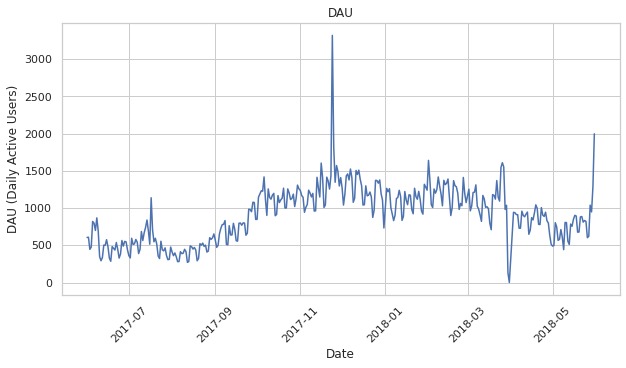

In [ ]:
plot_activity(visits, 'start_date', 'start_date', 'user_id', 'Date', 'DAU (Daily Active Users)', 'DAU')


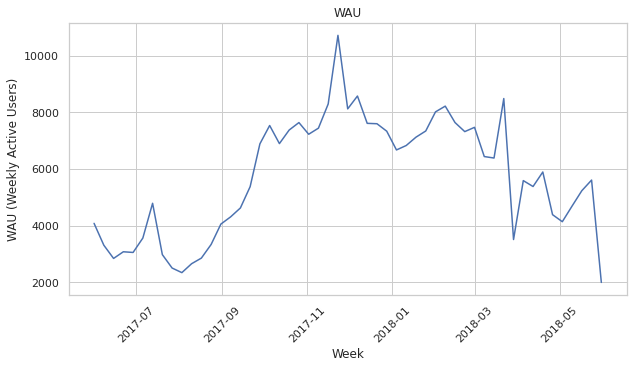

In [ ]:
plot_activity(visits, 'start_week', 'start_week', 'user_id', 'Week', 'WAU (Weekly Active Users)', 'WAU')


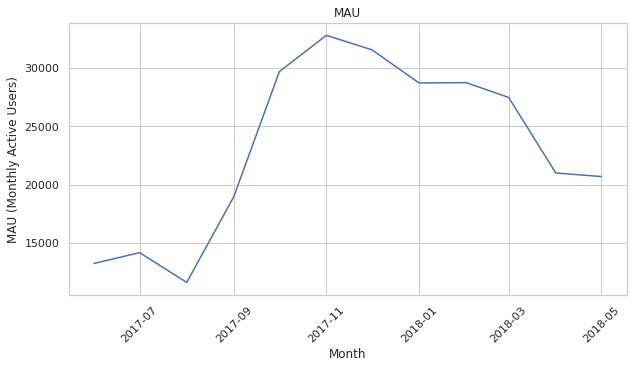

In [ ]:
plot_activity(visits, 'start_month', 'start_month', 'user_id', 'Month', 'MAU (Monthly Active Users)', 'MAU')

Selain itu terdapat anlisis dengan grafik terhadap aktivitas pengguna yang menggambarkan DAU, WAU, dan MAU dari waktu ke waktu
 
- Pada grafik DAU kenaikan tertinggi pengguna terjadi pada akhir tahun 2017 namun hanya sementara. Lalu terdapat penurunan drastis setelah maret 2018 namun kembali naik pada mei 2018

- Pada grafik WAU kenaikan tertinggi pengguna juga terjadi pada akhir tahun 2017 dan juga terdapat penurunan terendah setelah maret 2018. Tetapi berbeda dengan data DAU, setelah bulan mei 2018 pada WAU justru menurun lagi.

- Pada grafik MAU kenaikan tertinggi pengguna juga terjadi pada akhir tahun 2017 dan juga terdapat penurunan terendah setelah maret 2018. 


Dari analisis diatas terdapat fluktuasi dalam jumlah pengguna aktif. Ditemukan pola tren pada grafik DAU,WAU, dan MAU yaitu peningkatan pada akhir tahun 2017, tetapi juga terdapat penurunan setelah Maret 2018 sebelum aktivitas pengguna kembali meningkat pada Mei 2018.

### 3.1.2 Berapa jumlah sesi per harinya? (Satu pengguna mungkin saja memiliki lebih dari satu sesi). <a id='quest_3.1.2'></a>

In [ ]:
sess_per_user = visits.groupby('start_date').agg({'user_id': ['count','nunique']}).reset_index()
sess_per_user.columns = ['start_date', 'n_sessions', 'n_users']
sess_per_user


,start_date,n_sessions,n_users
0,2017-06-01,664,605
1,2017-06-02,658,608
2,2017-06-03,477,445
3,2017-06-04,510,476
4,2017-06-05,893,820
...,...,...,...
359,2018-05-27,672,620
360,2018-05-28,1156,1039
361,2018-05-29,1035,948
362,2018-05-30,1410,1289


Average session per day: 987 Session
Average session per user spends : 1.0 session per month


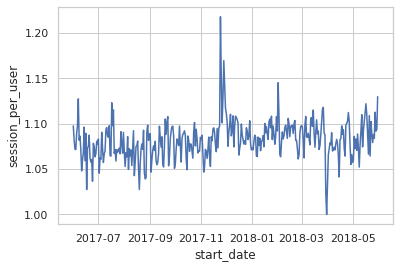

In [ ]:
avg_session_per_day = (visits
    .groupby('start_date')
    .agg({'user_id':'count'})
    .mean()
)
sess_per_user['session_per_user'] = sess_per_user['n_sessions'] / sess_per_user['n_users']

print('Average session per day:', int(avg_session_per_day), 'Session')
print('Average session per user spends :',sess_per_user['session_per_user'].mean().round() , 'session per month')

sns.lineplot(data=sess_per_user, x='start_date', y='session_per_user')
plt.show()

- Jumlah sesi harian bervariasi sepanjang periode, dengan puncak aktivitas tertinggi terjadi sekitar akhir tahun 2017 dan menurun setelahnya.

- Jumlah sesi per harinya rata-rata adalah sekitar 987 sesi per hari.

- Rata-rata, setiap pengguna hanya menghabiskan satu sesi per bulan, yang menunjukkan bahwa pengguna cenderung tidak sering kembali ke produk dalam satu bulan.

- Grafik menunjukkan fluktuasi dalam sesi per pengguna dari waktu ke waktu, dengan kenaikan tertinggi terjadi pada awal periode observasi, lalu perlahan-lahan menurun. Kesimpulannya, meskipun ada banyak sesi harian, pengguna tampaknya tidak selalu kembali dalam satu bulan, dan penggunaan produk tampaknya menurun seiring waktu.

### 3.1.3 Berapa lama durasi untuk setiap sesi? <a id='quest_3.1.3'></a>

In [ ]:
sess_duration = (visits['end_ts'] - visits['start_ts']).dt.seconds / 60
session_duration_avg = sess_duration.mean()
print('Average duration session:', round(session_duration_avg, 2), 'minutes')


Average duration session: 10.73 minutes


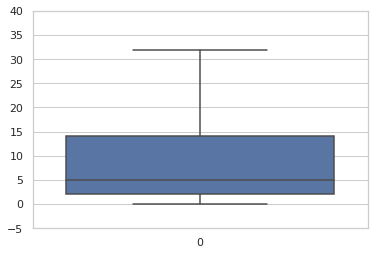

In [ ]:
ax = sns.boxplot(data=sess_duration, fliersize=0)
ax.set(ylim=(-5, 40))
plt.show()

- Durasi rata-rata untuk setiap sesi adalah sekitar 10.73 menit. Hal ini menunjukkan bahwa pengguna rata-rata menghabiskan waktu selama 10.73 menit dalam setiap sesi penggunaan produk.

- Grafik boxplot menggambarkan distribusi durasi sesi. Terdapat beberapa nilai yang lebih lama (outliers) yang berada di atas batas atas. Dengan sebagian besar sesi berdurasi antara 0 hingga 20 menit, serta beberapa sesi yang lebih lama.

### 3.1.4 Seberapa sering pengguna kembali untuk menggunakan produk?   <a id='quest_3.1.4'></a>

In [ ]:
sticky_wau = dau_total / wau_total * 100
sticky_mau = dau_total / mau_total * 100
print('Sticky Wau:',"%.2f" % sticky_wau, '%')
print('Sticky Mau:',"%.2f" % sticky_mau, '%')

Sticky Wau: 15.86 %
Sticky Mau: 3.91 %


In [ ]:
# mendapatkan pertama sesi
first_visits = visits.groupby('user_id').agg({'start_ts': 'min'}).reset_index()
first_visits.columns = ['user_id', 'first_session_start_ts']
first_visits.head()

,user_id,first_session_start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [ ]:
# mencari tanggal dan bulan pertama visit
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_month'] = first_visits['first_session_dt'].astype('datetime64[M]')
first_visits

,user_id,first_session_start_ts,first_session_dt,first_session_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01
...,...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,2017-11-30,2017-11-01
228165,18446424184725333426,2017-12-06 20:32:00,2017-12-06,2017-12-01
228166,18446556406699109058,2018-01-01 16:29:00,2018-01-01,2018-01-01
228167,18446621818809592527,2017-12-27 13:27:00,2017-12-27,2017-12-01


In [ ]:
visits_full = pd.merge(first_visits, visits, on = 'user_id')
visits_full.head()

,user_id,first_session_start_ts,first_session_dt,first_session_month,device,end_ts,source_id,start_ts,start_date,start_month,start_week,start_year
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01,2018
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02-06,2018-02-01,2018-02-01,2018
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06-07,2017-06-01,2017-06-01,2017
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,2018-03-01,2018-03-08,2018
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017-09-01,2017-09-14,2017


In [ ]:
visits_full['age_months'] = ((visits_full['start_month'] - visits_full['first_session_month']) / np.timedelta64(1,'M')).round().astype('int')
visits_full.head()

,user_id,first_session_start_ts,first_session_dt,first_session_month,device,end_ts,source_id,start_ts,start_date,start_month,start_week,start_year,age_months
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01,2018,0
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02-06,2018-02-01,2018-02-01,2018,0
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06-07,2017-06-01,2017-06-01,2017,0
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,2018-03-01,2018-03-08,2018,6
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017-09-01,2017-09-14,2017,0


In [ ]:
cohorts_visits = visits_full.pivot_table(index='first_session_month', columns='age_months', values='user_id', aggfunc='nunique')
cohorts_visits.fillna('')


age_months,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02-01,22197.0,1267.0,565.0,446.0,,,,,,,,


In [ ]:
percent_cohort = cohorts_visits.copy()
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    percent_cohort[f'%{i}'] = round(percent_cohort[i] / percent_cohort[0] * 100, 1)
    if i != 0:
        percent_cohort = percent_cohort.drop([i], axis=1)

percent_cohort = percent_cohort.drop([0], axis=1)

percent_cohort.fillna('')

age_months,%0,%1,%2,%3,%4,%5,%6,%7,%8,%9,%10,%11
first_session_month,,,,,,,,,,,,
2017-06-01,100.0,7.9,5.4,6.1,6.9,7.1,6.1,5.8,5.2,5.1,4.1,4.5
2017-07-01,100.0,5.6,5.1,5.6,5.8,4.8,4.5,4.6,3.9,2.9,2.7,
2017-08-01,100.0,7.7,6.3,6.3,5.0,4.4,3.6,3.9,2.8,2.6,,
2017-09-01,100.0,8.5,6.9,5.1,3.9,3.8,3.6,2.4,2.3,,,
2017-10-01,100.0,7.9,5.2,3.9,3.4,3.2,2.1,2.0,,,,
2017-11-01,100.0,7.8,4.4,3.9,3.4,2.3,2.2,,,,,
2017-12-01,100.0,5.6,3.8,3.1,2.0,1.9,,,,,,
2018-01-01,100.0,6.0,3.9,2.5,2.0,,,,,,,
2018-02-01,100.0,5.7,2.5,2.0,,,,,,,,


<AxesSubplot:xlabel='age_months', ylabel='first_session_month'>

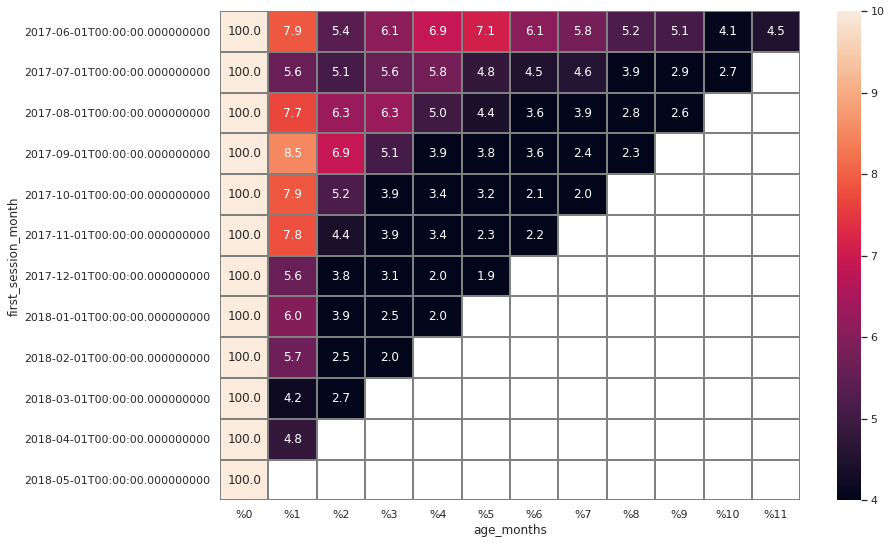

In [ ]:
plt.figure(figsize=(13, 9))

sns.heatmap(
    percent_cohort ,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
    vmin = 4, 
    vmax = 10
) 

- Sticky Wau adalah 15.86% dan Sticky Mau adalah 3.91%. Kedua angka ini relatif rendah, menunjukkan kemungkinana bahwa sebagian besar pengguna tidak kembali secara teratur setiap minggu atau bulan.

- Pada heatmap kohort retensi, dapat dilihat bahwa persentase pengguna yang tetap aktif mengalami penurunan seiring berjalannya waktu. Semakin tua kohort pengguna, semakin rendah persentase retensinya.

**Kesimpulan Analisa Produk** 

  - Pengguna Aktif: Terdapat fluktuasi dalam jumlah pengguna aktif (DAU, WAU, MAU) selama periode yang diamati. Ada peningkatan pada akhir tahun 2017, tetapi juga terdapat penurunan setelah Maret 2018 sebelum aktivitas pengguna kembali meningkat pada Mei 2018.

  - Sesi Pengguna: Jumlah sesi harian bervariasi sepanjang periode, dengan puncak aktivitas tertinggi terjadi sekitar akhir tahun 2017 dan penurunan setelahnya. Rata-rata, setiap pengguna hanya menghabiskan satu sesi per bulan, yang menunjukkan bahwa pengguna cenderung tidak sering kembali ke produk dalam satu bulan.

  - Durasi Sesi: Rata-rata durasi sesi adalah sekitar 10.73 menit. Hal ini menunjukkan bahwa pengguna rata-rata menghabiskan waktu selama 10.73 menit dalam setiap sesi penggunaan produk. Grafik boxplot menunjukkan variasi dalam durasi sesi, dengan sebagian besar sesi berdurasi antara 0 hingga 20 menit.

  - Tingkat Retensi: Sticky Wau (15.86%) dan Sticky Mau (3.91%) adalah relatif rendah, menunjukkan bahwa sebagian besar pengguna tidak kembali secara teratur setiap minggu atau bulan. Retensi pengguna mengalami penurunan seiring berjalannya waktu, dengan kohort pengguna yang lebih tua memiliki persentase retensi yang lebih rendah.

Data menunjukkan bahwa ada fluktuasi dalam aktivitas pengguna selama periode yang diamati. Meskipun terdapat peningkatan pada akhir tahun 2017, retensi pengguna dan kebiasaan pengguna kembali cenderung menurun seiring waktu. Untuk meningkatkan retensi dan keterlibatan pengguna, diperlukan upaya lebih lanjut, seperti kampanye pemasaran atau peningkatan fitur produk, terutama untuk kohort pengguna yang lebih tua.

## 3.2 Analisa Penjualan <a id='sales_analytic'></a>

### 3.2.1 Kapan orang-orang mulai melakukan pembelian? <a id='quest_3.2.1'></a>

In [ ]:
first_order_date = orders.groupby('user_id')['buy_ts'].min()
first_order_date.name = 'first_order_dt'
orders = orders.join(first_order_date, on='user_id')

In [ ]:
first_sess = first_visits[['user_id','first_session_start_ts']]
first_session_ts = first_sess.groupby('user_id')['first_session_start_ts'].min()

first_session_ts.name = 'first_session_dt'
orders = orders.join(first_session_ts, on='user_id')
orders.head()

,buy_ts,revenue,user_id,first_order_dt,first_session_dt
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00


In [ ]:
orders['conversion'] = ((orders['first_order_dt'] - orders['first_session_dt']).dt.seconds)/(60)
orders.head()

,buy_ts,revenue,user_id,first_order_dt,first_session_dt,conversion
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.0


In [ ]:
print('Median hingga pembelian sejak sesi pertama:',int(orders['conversion'].median()), 'minutes')
print('Rata-rata waktu hingga pembelian sejak sesi pertama:',int(orders['conversion'].mean()), 'minutes')


Median hingga pembelian sejak sesi pertama: 20 minutes
Rata-rata waktu hingga pembelian sejak sesi pertama: 284 minutes


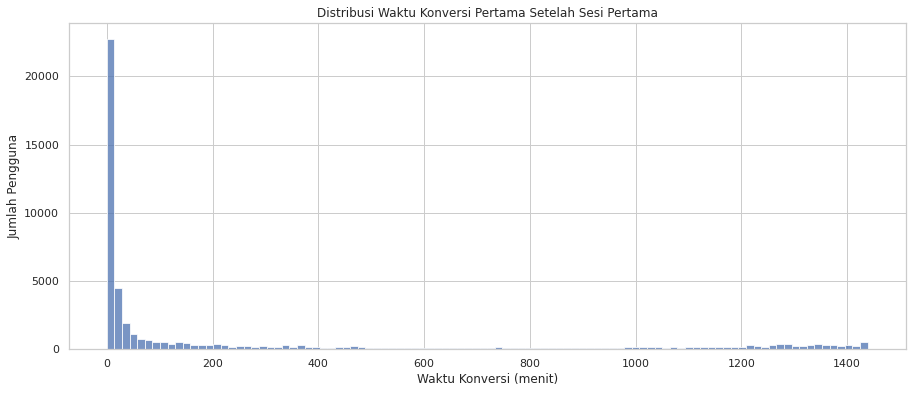

In [ ]:
# Membuat histogram menggunakan Seaborn
plt.figure(figsize=(15, 6))
sns.histplot(data=orders, x='conversion', bins=100)
plt.title('Distribusi Waktu Konversi Pertama Setelah Sesi Pertama')
plt.xlabel('Waktu Konversi (menit)')
plt.ylabel('Jumlah Pengguna')
plt.show()

- Median Waktu Konversi: Median dari waktu konversi sejak sesi pertama adalah sekitar 20 menit. Ini berarti bahwa setengah dari pengguna melakukan pembelian pertama dalam waktu kurang dari 20 menit setelah sesi pertama mereka.


- Rata-rata Waktu Konversi: Rata-rata waktu konversi sejak sesi pertama adalah sekitar 284 menit atau sekitar 4,73 jam. Ini mencerminkan rata-rata waktu yang dibutuhkan oleh pengguna untuk melakukan pembelian pertama mereka setelah sesi pertama.


- Distribusi Waktu Konversi: Pada histogram, dapat dilihat bahwa sebagian besar pengguna melakukan pembelian pertama dalam waktu yang relatif cepat setelah sesi pertama mereka. Namun, ada juga beberapa pengguna yang membutuhkan waktu lebih lama untuk melakukan pembelian pertama.

### 3.2.2 Berapa jumlah pesanan yang mereka buat selama periode waktu tertentu? <a id='quest_3.2.2'></a>

In [ ]:
orders['first_order_month'] = orders['first_order_dt'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

orders['cohort_lifetime'] = (orders['order_month'] - orders['first_order_month']) / np.timedelta64(1, 'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')

orders['first_order_month'] = orders['first_order_month'].dt.strftime('%Y-%m') 

orders.head()

,buy_ts,revenue,user_id,first_order_dt,first_session_dt,conversion,first_order_month,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.0,2017-06,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.0,2017-06,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.0,2017-06,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.0,2017-06,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.0,2017-06,2017-06-01,0


In [ ]:
order_pivot = orders.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='user_id',
    aggfunc='count',
)

order_pivot.fillna('') 

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0
2017-07,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,
2017-08,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,,
2017-09,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,,,
2017-10,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,,,,
2017-11,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,,,,,
2017-12,5052.0,270.0,202.0,179.0,86.0,105.0,,,,,,
2018-01,3783.0,224.0,159.0,64.0,78.0,,,,,,,
2018-02,4095.0,222.0,83.0,70.0,,,,,,,,


In [ ]:
order_pivot_percentage = order_pivot.div(order_pivot.iloc[:, 0], axis=0) * 100
order_pivot_percentage

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,100.0,7.519116,7.391674,9.600680,12.404418,9.260833,11.724724,7.391674,9.005947,6.499575,4.078165,3.653356
2017-07,100.0,4.574565,5.489478,4.757548,3.293687,3.751144,2.790485,2.287283,2.653248,1.097896,2.424520,NaN
2017-08,100.0,7.045010,6.523157,5.283757,5.544684,4.044357,3.196347,5.088063,3.000652,3.000652,NaN,NaN
2017-09,100.0,7.466758,5.489260,5.591544,2.284350,3.716331,3.682237,1.909308,2.079782,NaN,NaN,NaN
2017-10,100.0,6.325544,3.263497,2.457695,2.598711,2.074940,1.732474,2.518131,NaN,NaN,NaN,NaN
2017-11,100.0,8.248494,3.781425,4.383960,2.825680,1.225847,2.119260,NaN,NaN,NaN,NaN,NaN
2017-12,100.0,5.344418,3.998416,3.543151,1.702296,2.078385,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,100.0,5.921227,4.203013,1.691779,2.061856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,100.0,5.421245,2.026862,1.709402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


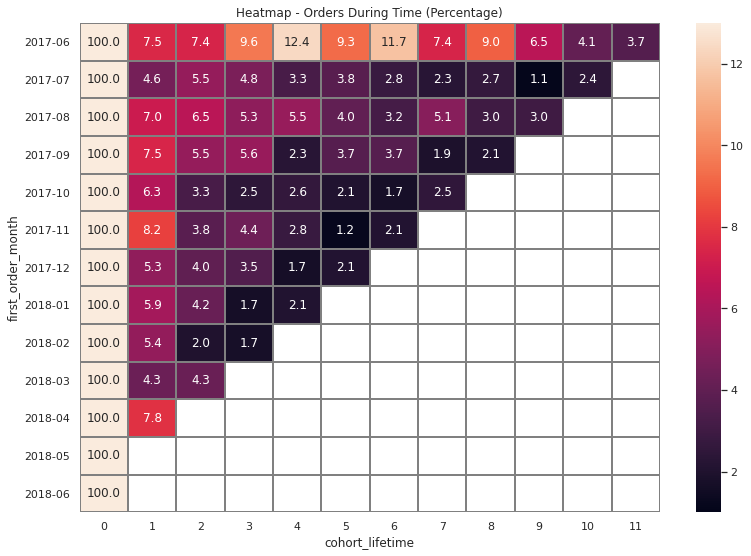

In [ ]:
plt.figure(figsize=(13, 9))
plt.title("Heatmap - Orders During Time (Percentage)")
sns.heatmap(
    order_pivot_percentage,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray', 
    vmin = 1,
    vmax = 13
)
plt.show()

- Mayoritas kohort memiliki waktu mulai pembelian (konversi) yang relatif singkat dalam bulan pertama mereka, dengan sebagian besar kohort memiliki persentase di kisaran 7% hingga 12%.

- Namun, terdapat penurunan yang signifikan dalam waktu mulai pembelian setelah beberapa bulan. Ini mungkin menunjukkan bahwa sebagian besar pengguna cenderung melakukan pembelian pertama mereka dalam waktu singkat setelah sesi pertama, tetapi kemungkinan akan mengalami penundaan dalam pembelian mereka seiring berjalannya waktu.

- Informasi ini dapat digunakan untuk mengoptimalkan strategi pemasaran, retensi pelanggan, dan perbaikan pengalaman pengguna agar pengguna cenderung melakukan pembelian lebih cepat setelah sesi pertama mereka.

### 3.2.3 Berapa besaran rata-rata pembeliannya?  <a id='quest_3.2.3'></a>

In [ ]:
# Hitung besaran rata-rata pembelian per kohor
avg_orders_sizes = orders.groupby(['order_month'])['revenue'].mean()
avg_orders_sizes

order_month
2017-06-01    4.060106
2017-07-01    5.306589
2017-08-01    4.847139
2017-09-01    5.416448
2017-10-01    4.928280
2017-11-01    4.783518
2017-12-01    5.852139
2018-01-01    4.112927
2018-02-01    4.840095
2018-03-01    5.413930
2018-04-01    5.150645
2018-05-01    4.771279
2018-06-01    3.420000
Name: revenue, dtype: float64

In [ ]:
print(f'The average purchase size:', avg_orders_sizes.mean().round())

The average purchase size: 5.0


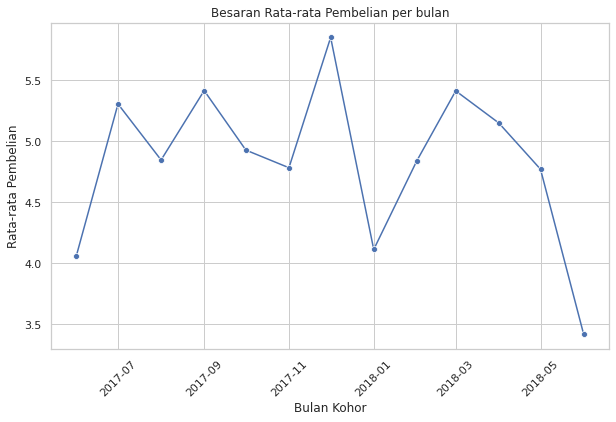

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_orders_sizes.index, y=avg_orders_sizes.values, marker='o')
plt.title('Besaran Rata-rata Pembelian per bulan')
plt.xlabel('Bulan Kohor')
plt.ylabel('Rata-rata Pembelian')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- Rata-rata pembelian per bulan berkisar antara 3.42 hingga 5.85, dengan fluktuasi yang terjadi dari bulan ke bulan.

- Pada bulan-bulan awal (tahun 2017), rata-rata pembelian berkisar antara 4.06 hingga 5.31.

- Terjadi fluktuasi dalam besaran pembelian selama periode observasi, dengan beberapa bulan mencatat rata-rata pembelian yang lebih tinggi dan beberapa bulan mencatat rata-rata yang lebih rendah.

- Pada bulan terakhir (Juni 2018), rata-rata pembelian turun menjadi sekitar 3.42.

- Untuk rata-rata besaran pembelian keselurahan adalah sebesar 5,0 yang berarti pelanggan rata-rata melakukan pembelian senilai 5 unit dalam satu transaksi.


### 3.2.4 Berapa jumlah uang yang mereka kontribusikan? (LTV) <a id='quest_3.2.4'></a>

In [ ]:
cohort_sizes= orders.groupby('first_order_month').agg({'user_id': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes
    

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340
5,2017-11,4081
6,2017-12,4383
7,2018-01,3373
8,2018-02,3651
9,2018-03,3533


In [ ]:
cohorts_orders = orders.groupby(['first_order_month','cohort_lifetime', 'order_month']).agg({'revenue': 'sum'}).reset_index()

cohorts_orders.head()


,first_order_month,cohort_lifetime,order_month,revenue
0,2017-06,0,2017-06-01,9557.49
1,2017-06,1,2017-07-01,981.82
2,2017-06,2,2017-08-01,885.34
3,2017-06,3,2017-09-01,1931.30
4,2017-06,4,2017-10-01,2068.58


In [ ]:
result = pd.merge(cohort_sizes, cohorts_orders, on='first_order_month')
result

,first_order_month,n_buyers,cohort_lifetime,order_month,revenue
0,2017-06,2023,0,2017-06-01,9557.49
1,2017-06,2023,1,2017-07-01,981.82
2,2017-06,2023,2,2017-08-01,885.34
3,2017-06,2023,3,2017-09-01,1931.30
4,2017-06,2023,4,2017-10-01,2068.58
...,...,...,...,...,...
74,2018-03,3533,2,2018-05-01,1114.87
75,2018-04,2276,0,2018-04-01,10600.69
76,2018-04,2276,1,2018-05-01,1209.92
77,2018-05,2988,0,2018-05-01,13925.76


In [ ]:
result['ltv'] = result['revenue'] / result['n_buyers']
result

,first_order_month,n_buyers,cohort_lifetime,order_month,revenue,ltv
0,2017-06,2023,0,2017-06-01,9557.49,4.724414
1,2017-06,2023,1,2017-07-01,981.82,0.485329
2,2017-06,2023,2,2017-08-01,885.34,0.437637
3,2017-06,2023,3,2017-09-01,1931.30,0.954671
4,2017-06,2023,4,2017-10-01,2068.58,1.022531
...,...,...,...,...,...,...
74,2018-03,3533,2,2018-05-01,1114.87,0.315559
75,2018-04,2276,0,2018-04-01,10600.69,4.657597
76,2018-04,2276,1,2018-05-01,1209.92,0.531599
77,2018-05,2988,0,2018-05-01,13925.76,4.660562


In [ ]:
ltv_pivot = result.pivot_table(index='first_order_month', columns='cohort_lifetime', values='ltv', aggfunc='mean').round(2)
ltv_pivot.fillna('') 

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02,4.16,0.28,0.08,0.07,,,,,,,,


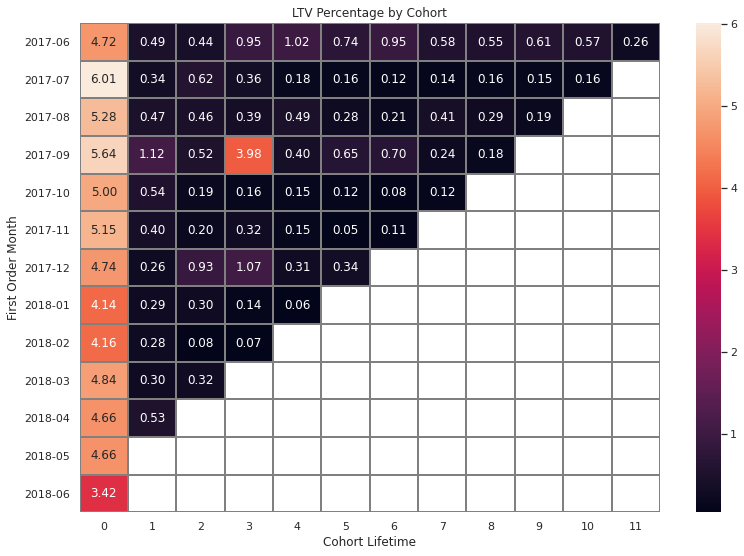

In [ ]:
# Create a heatmap
plt.figure(figsize=(13, 9))
sns.heatmap(ltv_pivot, annot=True, fmt=".2f",  linewidths=1, linecolor='gray')
plt.title('LTV Percentage by Cohort')
plt.xlabel('Cohort Lifetime')
plt.ylabel('First Order Month')
plt.show()

In [ ]:
ltv_values = {}
for cohort_month, row in ltv_pivot.iterrows():
    ltv_cohort = row.sum()
    ltv_values[cohort_month] = ltv_cohort

# Menampilkan LTV untuk setiap kohor
print("\nLTV Setiap Kohor")
for cohort_month, ltv_cohort in ltv_values.items():
    print(f"LTV {cohort_month}: {ltv_cohort:.2f}")


LTV Setiap Kohor
LTV 2017-06: 11.88
LTV 2017-07: 8.40
LTV 2017-08: 8.47
LTV 2017-09: 13.43
LTV 2017-10: 6.36
LTV 2017-11: 6.38
LTV 2017-12: 7.65
LTV 2018-01: 4.93
LTV 2018-02: 4.59
LTV 2018-03: 5.46
LTV 2018-04: 5.19
LTV 2018-05: 4.66
LTV 2018-06: 3.42


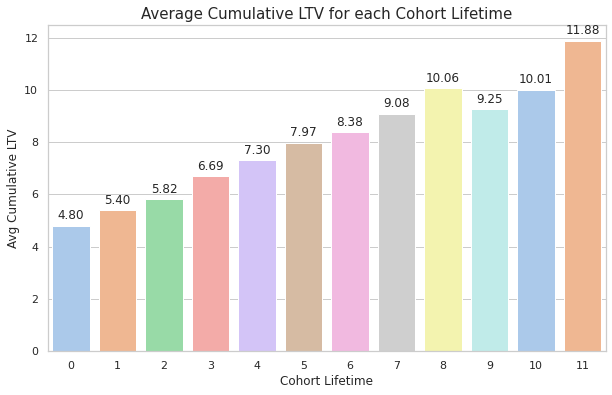

In [ ]:
cumulative_ltv = ltv_pivot.cumsum(axis=1).mean(axis=0).reset_index()
cumulative_ltv.columns = ['Cohort Lifetime', 'Avg Cumulative LTV']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=cumulative_ltv, x='Cohort Lifetime', y='Avg Cumulative LTV', palette='pastel')

for patch in ax.patches:
    ax.annotate(f'{patch.get_height():.2f}',
                (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points', rotation=0)

plt.title('Average Cumulative LTV for each Cohort Lifetime', fontsize=15)
plt.xlabel('Cohort Lifetime')
plt.ylabel('Avg Cumulative LTV')
plt.show()

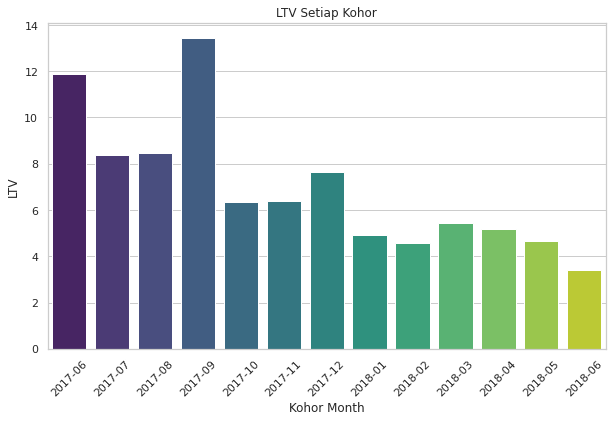

In [ ]:
cohort_months = list(ltv_values.keys())
ltv_values = list(ltv_values.values())

# Membuat DataFrame dari data
ltv_data = pd.DataFrame({'Cohort Month': cohort_months, 'LTV': ltv_values})

# Membuat grafik barplot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Cohort Month', y='LTV', data=ltv_data, palette='viridis')
plt.title('LTV Setiap Kohor')
plt.xlabel('Kohor Month')
plt.ylabel('LTV')
plt.xticks(rotation=45)
plt.show()

- LTV rata-rata pelanggan bervariasi tergantung pada kohor pelanggan pertama kali membeli produk atau menggunakan layanan.

- Kohor 2017-06 memiliki nilai LTV terbesar yaitu 11,88, sedangkan kohor 2018-06 memiliki nilai LTV terendah yaitu 3,42.

- Grafik heatmap menunjukkan korelasi antara nilai LTV dan kohor. Dapat dicek bahwa nilai LTV untuk kohor yang lebih awal (seperti 2017-06 dan 2017-07) lebih besar daripada kohor yang lebih akhir (seperti 2018-05 dan 2018-06). Hal ini mungkin karena faktor-faktor seperti peningkatan kompetisi, perubahan dalam preferensi pelanggan, atau faktor-faktor lain yang mempengaruhi keputusan pelanggan. 

- Adanya korelasi antara durasi pelanggan dengan besaran LTV. Yaitu, pelanggan yang berlangganan lebih lama, maka LTV nya juga semakin besar. 

- Terlihat adanya beberapa bulan yang LTV nya relatif rendah, yaitu bulan ke-4 hingga ke-6 tahun 2018. Hal ini mungkin disebabkan oleh faktor-faktor seperti musim, promo, atau kondisi pasar.



**Kesimpulan Analisa Penjualan** 

1.  Waktu Mulai Pembelian:

     -  Median waktu konversi sejak sesi pertama adalah sekitar 20 menit, menunjukkan bahwa setengah dari pengguna melakukan pembelian dalam waktu kurang dari 20 menit.

     -  Rata-rata waktu konversi sejak sesi pertama adalah sekitar 284 menit atau sekitar 4,73 jam, menggambarkan rata-rata waktu yang dibutuhkan oleh pengguna untuk melakukan pembelian pertama mereka setelah sesi pertama.

2. Distribusi Waktu Konversi:
    
    -  Sebagian besar pengguna melakukan pembelian pertama dalam waktu yang relatif cepat setelah sesi pertama, namun ada juga yang membutuhkan waktu lebih lama.
    
    -  Mayoritas kohort memiliki waktu mulai pembelian yang singkat dalam bulan pertama mereka, dengan persentase mayoritas kohort berada di kisaran 7% hingga 12%.
    
    -  Terjadi penurunan yang signifikan dalam waktu mulai pembelian setelah beberapa bulan, menunjukkan kemungkinan penundaan dalam pembelian seiring berjalannya waktu.

3. Rata-rata Besaran Pembelian:
   
   -  Rata-rata pembelian per bulan berkisar antara 3,42 hingga 5,85, dengan fluktuasi yang terjadi dari bulan ke bulan.
   
   -  Pada bulan-bulan awal (tahun 2017), rata-rata pembelian berkisar antara 4,06 hingga 5,31.
   
   -  Terjadi fluktuasi dalam besaran pembelian selama periode observasi, dengan beberapa bulan mencatat rata-rata pembelian yang lebih tinggi dan beberapa bulan mencatat rata-rata yang lebih rendah.
   
   -  Rata-rata besaran pembelian keseluruhan adalah sebesar 5,0, menunjukkan bahwa pelanggan rata-rata melakukan pembelian senilai 5 unit dalam satu transaksi.



4. Nilai Umur Pelanggan (LTV):
   
   -  LTV rata-rata pelanggan bervariasi tergantung pada kohor pelanggan pertama kali membeli produk atau menggunakan layanan.
   
   -  Kohor 2017-06 memiliki nilai LTV terbesar yaitu 11,88, sedangkan kohor 2018-06 memiliki nilai LTV terendah yaitu 3,42.
   
   -  Terdapat korelasi antara nilai LTV dan kohor, dengan kohor yang lebih awal cenderung memiliki nilai LTV yang lebih tinggi daripada kohor yang lebih baru.
   
   -  Terdapat korelasi antara durasi pelanggan dengan besaran LTV, di mana pelanggan yang berlangganan lebih lama cenderung memiliki LTV yang lebih besar.
   
   -  Beberapa bulan tertentu (bulan ke-4 hingga ke-6 tahun 2018) menunjukkan LTV yang relatif rendah, yang dapat dipengaruhi oleh faktor-faktor seperti musim, promo, atau kondisi pasar.


## 3.3 Analisa Pemasaran <a id='market_analytic'></a>

### 3.3.1 Berapa jumlah uang yang dihabiskan? Keseluruhan/per sumber/dari waktu ke waktu  <a id='quest_3.3.1'></a>

In [ ]:
total_costs = costs['costs'].sum()
print(f"Total pengeluaran keseluruhan: ${total_costs:.2f}")

Total pengeluaran keseluruhan: $329131.62


In [ ]:
source_costs = costs.groupby('source_id').agg(total_costs=('costs', 'sum')).reset_index()
source_costs['percentage'] = (source_costs['total_costs'] / source_costs['total_costs'].sum()) * 100
# Mengurutkan hasil dari tertinggi
source_costs = source_costs.sort_values(by='total_costs', ascending=False)
source_costs

,source_id,total_costs,percentage
2,3,141321.63,42.937725
3,4,61073.60,18.555981
4,5,51757.10,15.725350
1,2,42806.04,13.005751
0,1,20833.27,6.329769
6,10,5822.49,1.769046
5,9,5517.49,1.676378


<Figure size 936x432 with 0 Axes>

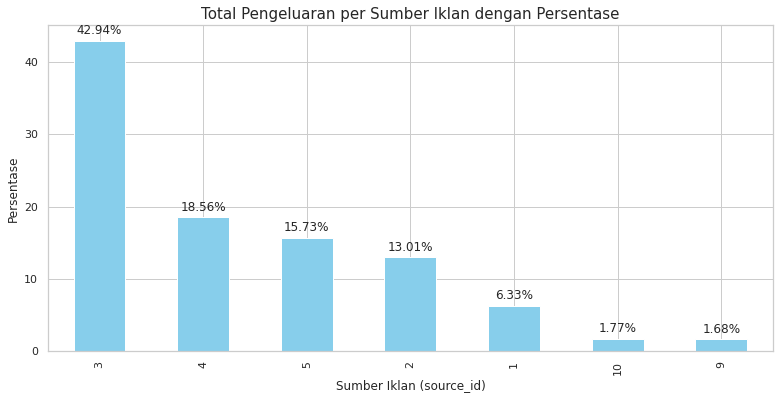

In [ ]:
plt.figure(figsize=(13, 6))
ax = source_costs.plot(kind='bar', x='source_id', y='percentage', figsize=(13, 6), legend=False, color='skyblue')
plt.title('Total Pengeluaran per Sumber Iklan dengan Persentase', fontsize=15)
plt.xlabel('Sumber Iklan (source_id)')
plt.ylabel('Persentase')

# Menambahkan label persentase di atas tiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
# Menambahkan kolom 'bulan' yang berisi bulan dari kolom 'dt'
costs['month'] = costs['dt'].dt.to_period('M')

# Mengelompokkan data berdasarkan 'bulan' dan 'source_id', dan menjumlahkan 'costs'
monthly_costs = costs.groupby('month').agg(costs=('costs', 'sum')).reset_index()
monthly_costs ['percentage'] = (monthly_costs['costs'] / monthly_costs['costs'].sum()) * 100
monthly_costs['month'] = monthly_costs['month'].dt.strftime('%Y-%m')
monthly_costs

,month,costs,percentage
0,2017-06,18015.00,5.473494
1,2017-07,18240.59,5.542035
2,2017-08,14790.54,4.493807
3,2017-09,24368.91,7.404001
4,2017-10,36322.88,11.035974
5,2017-11,37907.88,11.517544
6,2017-12,38315.35,11.641346
7,2018-01,33518.52,10.183926
8,2018-02,32723.03,9.942232
9,2018-03,30415.27,9.241066


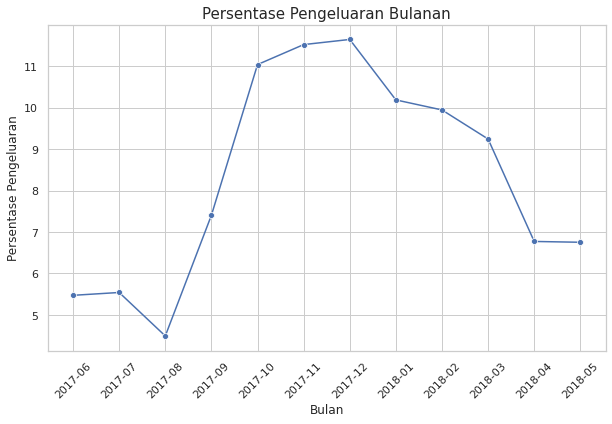

In [ ]:
# Membuat lineplot dari salinan data
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_costs, x='month', y='percentage', marker='o')
plt.title('Persentase Pengeluaran Bulanan', fontsize=15)
plt.xlabel('Bulan')
plt.ylabel('Persentase Pengeluaran')
plt.xticks(rotation=45)
plt.show()

- Total pengeluaran keseluruhan untuk pemasaran adalah 329,131.62.

-  Pengeluaran cenderung meningkat pada bulan-bulan awal, mencapai puncaknya, dan kemudian mengalami penurunan. Meskipun ada fluktuasi bulanan, sumber iklan dengan ID 3 memiliki kontribusi pengeluaran yang konsisten dan signifikan sepanjang periode.

- Bulan dengan persentase pengeluaran paling tinggi adalah bulan Oktober 2017, dengan persentase sekitar 11.04%.

- Bulan dengan persentase pengeluaran paling rendah adalah bulan Maret 2018, dengan persentase sekitar 6.77%.


### 3.3.2 Berapa biaya akuisisi pelanggan dari masing-masing sumber? <a id='quest_3.3.2'></a>

In [ ]:
source_sizes = visits.groupby('source_id').agg({'user_id': 'nunique'}).reset_index()
source_sizes.columns = ['source_id', 'n_visitors']
source_sizes

,source_id,n_visitors
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974
5,6,6
6,7,34
7,9,9264
8,10,8067


In [ ]:
# Gabungkan data biaya dengan jumlah pelanggan per sumber
cac_report = source_sizes.join(source_costs['total_costs'], how='left', on = 'source_id')

# Hitung CAC (Biaya Akuisisi Pelanggan)
cac_report['cac'] = cac_report['total_costs'] / cac_report['n_visitors']

cac_report

,source_id,n_visitors,total_costs,cac
0,1,18999,42806.04,2.253068
1,2,26245,141321.63,5.384707
2,3,74756,61073.60,0.816973
3,4,83525,51757.10,0.619660
4,5,56974,5517.49,0.096842
5,6,6,5822.49,970.415000
6,7,34,NaN,NaN
7,9,9264,NaN,NaN
8,10,8067,NaN,NaN


In [ ]:
result = pd.merge(result, monthly_costs[['month', 'costs']], left_on='first_order_month', right_on='month')
result['cac'] = result['costs'] / result['n_buyers']
result.head()

,first_order_month,n_buyers,cohort_lifetime,order_month,revenue,ltv,month,costs,cac
0,2017-06,2023,0,2017-06-01,9557.49,4.724414,2017-06,18015.0,8.905091
1,2017-06,2023,1,2017-07-01,981.82,0.485329,2017-06,18015.0,8.905091
2,2017-06,2023,2,2017-08-01,885.34,0.437637,2017-06,18015.0,8.905091
3,2017-06,2023,3,2017-09-01,1931.30,0.954671,2017-06,18015.0,8.905091
4,2017-06,2023,4,2017-10-01,2068.58,1.022531,2017-06,18015.0,8.905091


- Biaya Akuisisi Pelanggan (CAC) per sumber pemasaran bervariasi.  ID 5 memiliki CAC terendah sebesar 0.096842, yang berarti biaya yang dikeluarkan untuk mendapatkan satu pelanggan dari sumber ini relatif rendah.

- ID 6 memiliki CAC tertinggi sebesar 970.415000. Hal ini menunjukkan bahwa biaya yang diperlukan untuk mendapatkan satu pelanggan dari sumber ini sangat tinggi dibandingkan dengan sumber lainnya.

- ID 3 memiliki CAC sebesar 0.816973, sementara sumber iklan dengan ID 4 memiliki CAC sebesar 0.619660. Kedua sumber ini juga memberikan CAC yang relatif rendah.

-  ID 1 memiliki CAC sebesar 2.253068, dan ID 2 memiliki CAC sebesar 5.384707. Kedua sumber ini memerlukan biaya yang lebih tinggi untuk mendapatkan satu pelanggan dibandingkan dengan sumber lainnya.

### 3.3.3 Seberapa menguntungkannya investasi tersebut? (ROI) <a id='quest_3.3.3'></a>
       

In [ ]:
result['roi'] = result['ltv'] / result['cac']

roi_pivot = result.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='roi',
    aggfunc='mean',
)
roi_cumsum = roi_pivot.cumsum(axis = 1).round(2)
roi_cumsum.fillna('') 

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02,0.46,0.49,0.5,0.51,,,,,,,,


<AxesSubplot:xlabel='cohort_lifetime', ylabel='first_order_month'>

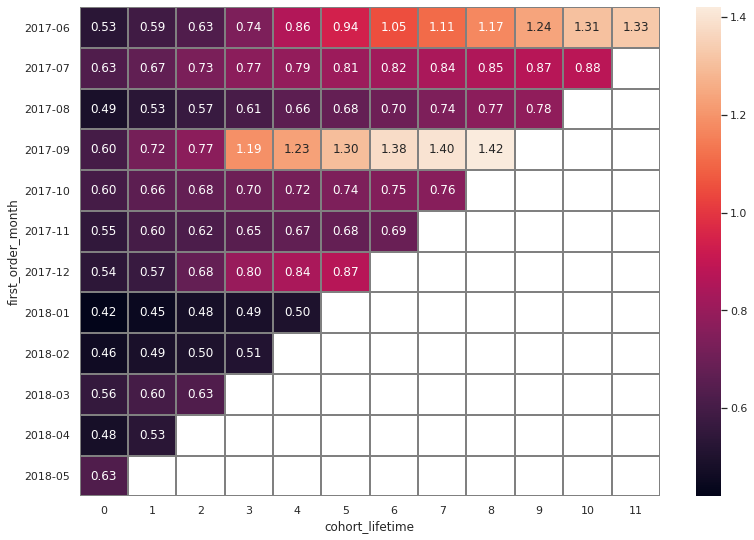

In [ ]:
plt.figure(figsize=(13, 9))

sns.heatmap(
    roi_cumsum,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray'
) 

In [ ]:
average_roi = roi_cumsum.mean(axis=0)
average_roi

cohort_lifetime
0     0.540833
1     0.582727
2     0.629000
3     0.717778
4     0.783750
5     0.860000
6     0.898333
7     0.970000
8     1.052500
9     0.963333
10    1.095000
11    1.330000
dtype: float64

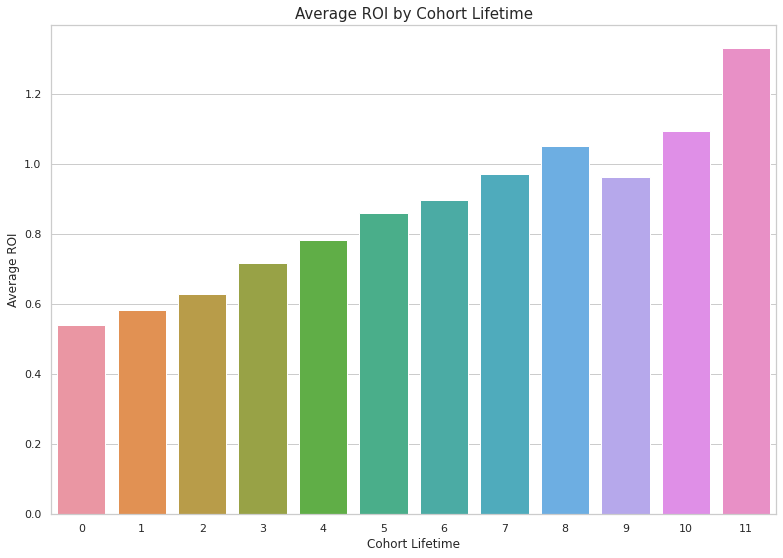

In [ ]:
# Create a bar plot using Seaborn
plt.figure(figsize=(13, 9))
sns.barplot(x=average_roi.index, y=average_roi.values)
plt.title('Average ROI by Cohort Lifetime', fontsize=15)
plt.xlabel('Cohort Lifetime')
plt.ylabel('Average ROI')
plt.xticks(rotation=0)
plt.show()

- ROI rata-rata cenderung meningkat seiring dengan berjalannya waktu (cohort_lifetime). Hal ini menunjukkan bahwa investasi pemasaran cenderung menjadi lebih menguntungkan seiring berjalannya waktu.

- Pada awal cohort_lifetime (0-2), ROI masih relatif rendah, tetapi kemudian meningkat secara signifikan pada cohort_lifetime 3 hingga 11.

- ROI mencapai puncaknya pada cohort_lifetime 11, dengan nilai ROI sebesar 1.33. Hal ini menunjukkan bahwa investasi pemasaran pada periode ini menghasilkan pengembalian yang paling menguntungkan.

- Meskipun ada fluktuasi dalam ROI dari satu cohort_lifetime ke cohort_lifetime lainnya, secara keseluruhan, investasi pemasaran cenderung menghasilkan pengembalian yang positif.

**Kesimpulan Analisa Pemasaran**

- Total pengeluaran keseluruhan untuk pemasaran adalah 329,131.62. Pengeluaran cenderung meningkat pada bulan-bulan awal, mencapai puncaknya, dan kemudian mengalami penurunan. Sumber iklan dengan ID 3 memiliki kontribusi pengeluaran yang konsisten dan signifikan sepanjang periode.

- Bulan Oktober 2017 memiliki persentase pengeluaran paling tinggi sekitar 11.04%, sedangkan bulan Maret 2018 memiliki persentase pengeluaran paling rendah sekitar 6.77%.

- Biaya Akuisisi Pelanggan (CAC) per sumber pemasaran bervariasi. Sumber iklan dengan ID 5 memiliki CAC terendah sebesar 0.096842, menunjukkan biaya yang relatif rendah untuk mendapatkan satu pelanggan dari sumber ini. Sementara itu, ID 6 memiliki CAC tertinggi sebesar 970.415000, menunjukkan biaya yang sangat tinggi untuk mendapatkan satu pelanggan dari sumber ini.

- Sumber iklan dengan ID 3 memiliki CAC sebesar 0.816973, sementara sumber iklan dengan ID 4 memiliki CAC sebesar 0.619660. Kedua sumber ini memberikan CAC yang relatif rendah.

- Sumber iklan dengan ID 1 memiliki CAC sebesar 2.253068, dan sumber iklan dengan ID 2 memiliki CAC sebesar 5.384707. Kedua sumber ini memerlukan biaya yang lebih tinggi untuk mendapatkan satu pelanggan dibandingkan dengan sumber lainnya.

- ROI rata-rata cenderung meningkat seiring dengan berjalannya waktu (cohort_lifetime). ROI mencapai puncaknya pada cohort_lifetime 11, dengan nilai ROI sebesar 1.33. Hal ini menunjukkan bahwa investasi pemasaran pada periode ini menghasilkan pengembalian yang paling menguntungkan.

- Meskipun ada fluktuasi dalam ROI dari satu cohort_lifetime ke cohort_lifetime lainnya, secara keseluruhan, investasi pemasaran cenderung menghasilkan pengembalian yang positif.

# Kesimpulan Umum <a id='conclusion'></a> 

Berdasarkan analisis yang telah dilakukan, terdapat beberapa kesimpulan yang dapat diambil untuk menyampaikan kepada para spesialis marketing terkait jumlah uang yang harus diinvestasikan dan ke mana saja uang tersebut harus diinvestasikan:

- Fluktuasi dalam aktivitas pengguna terjadi selama periode yang diamati. Terdapat peningkatan pada akhir tahun 2017, namun retensi pengguna dan kebiasaan pengguna kembali cenderung menurun seiring waktu. Oleh karena itu, diperlukan upaya lebih lanjut untuk meningkatkan retensi dan keterlibatan pengguna, seperti kampanye pemasaran atau peningkatan fitur produk. Investasi pemasaran yang ditargetkan pada kohort pengguna yang lebih tua dapat membantu meningkatkan retensi dan keterlibatan.

- Waktu konversi untuk melakukan pembelian pertama oleh pengguna cenderung relatif cepat, dengan rata-rata sekitar 4,73 jam sejak sesi pertama. Dengan demikian, investasi pemasaran dapat difokuskan pada meningkatkan konversi pengguna dalam waktu yang lebih singkat setelah sesi pertama, misalnya melalui strategi retargeting atau peningkatan pengalaman pengguna selama sesi pertama.

- Besaran pembelian rata-rata per bulan bervariasi dari bulan ke bulan, namun secara keseluruhan rata-rata adalah sebesar 5 unit per transaksi. Investasi pemasaran dapat difokuskan pada meningkatkan nilai transaksi per pelanggan, misalnya melalui promosi bundling atau penawaran khusus untuk pembelian dalam jumlah yang lebih besar.

- Nilai Umur Pelanggan (LTV) memiliki variasi tergantung pada kohort pelanggan pertama kali membeli produk atau menggunakan layanan. Kohort yang lebih awal cenderung memiliki LTV yang lebih tinggi daripada kohort yang lebih baru. Oleh karena itu, investasi pemasaran dapat difokuskan pada mempertahankan pelanggan dari kohort yang lebih awal dan meningkatkan LTV pelanggan melalui strategi retensi dan peningkatan pengeluaran per pelanggan.


Berdasarkan analisis ini, rekomendasi kami adalah untuk berinvestasi dalam strategi pemasaran yang bertujuan meningkatkan retensi pengguna, meningkatkan konversi pengguna dalam waktu singkat setelah sesi pertama, meningkatkan nilai transaksi per pelanggan, dan mempertahankan pelanggan dari kohort yang lebih awal. Sumber/platform pemasaran yang direkomendasikan mungkin berbeda tergantung pada analisis lebih lanjut, tetapi sumber iklan dengan ID 3 dan 4 telah menunjukkan kontribusi yang konsisten dan biaya per akuisisi (CAC) yang relatif rendah. Oleh karena itu, kami merekomendasikan mempertimbangkan sumber iklan ini sebagai pilihan yang baik untuk berinvestasi.


Kesimpulan yang dapat dibuat setelah menemukan nilai dari metrik-metrik tersebut adalah bahwa investasi pemasaran yang tepat dapat membantu meningkatkan retensi pengguna, konversi pengguna, besaran pembelian, dan nilai umur pelanggan. Dengan memahami pola dan tren dari data analisis, para spesialis marketing dapat mengambil keputusan yang lebih baik dalam mengalokasikan anggaran pemasaran dan merencanakan strategi yang efektif untuk mencapai tujuan pemasaran perusahaan.